In [ ]:
pip install requests pandas openpyxl


# General Explanation Before Start

**The Excel spreadsheet contains data dictionaries for four different datasets, indicated by the sheet names: '990', '990-EZ', '990-PF', and 'Codes'. These sheets likely correspond to different forms or sections of nonprofit tax filings:**

- **990**: This sheet probably details the standard Form 990, which is a comprehensive tax form that larger nonprofits are required to file. It includes information on the organization's mission, programs, and finances.

- **990-EZ**: This form is a shorter version of the Form 990, intended for smaller nonprofits. It collects essential information about the nonprofit's financial activities but in less detail than the full Form 990.

- **990-PF**: Form 990-PF is specifically for private foundations, including information on grants given, investments, and operations.

- **Codes**: This sheet provide explanations for various codes used across the other datasets, such as activity codes, financial codes, or status codes.


# Data (990)

***The dataset meticulously documents each row as a distinct electronic filing occurrence, uniquely identified by an Employer Identification Number (EIN) and linked to a specific tax period. Contrary to a singular focus, the dataset encompasses a rich historical breadth, featuring filings that span from the tax period of 2012 through to 2022. This historical depth, marked by its inclusive range of filing years, equips the dataset with a robust framework for conducting comprehensive time-series analyses. Such analyses are poised to unearth longitudinal trends and patterns, offering a panoramic view of filing behaviors across a decade. This expansive temporal coverage not only enriches the understanding of year-over-year evolutions but also enhances the capacity to forecast future trends within the dataset's scope.***

In [1]:
import requests

url = 'https://www.irs.gov/pub/irs-soi/22eoextract990.xlsx'
r = requests.get(url)

# Assuming the URL points directly to an Excel file, 
# and the response content is the file itself
with open('22eoextract990.xlsx', 'wb') as f:
    f.write(r.content)

In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('22eoextract990.xlsx')

# Display the first few rows to confirm it's loaded correctly
print(df.head())

  efile         EIN    tax_pd  subseccd s501c3or4947a1cd schdbind  \
0     P  10018922.0  202004.0      19.0                N        N   
1     E  10018922.0  202104.0      19.0                N        N   
2     E  10018922.0  202204.0      19.0                N        N   
3     E  10018923.0  202105.0      19.0                N        N   
4     E  10018923.0  202205.0      19.0                N        N   

  politicalactvtscd lbbyingactvtscd subjto6033cd dnradvisedfundscd  ...  \
0                 N             NaN            N                 N  ...   
1                 N             NaN            N                 N  ...   
2                 N             NaN            N                 N  ...   
3                 N             NaN            N                 N  ...   
4                 N             NaN            N                 N  ...   

  exceeds1pct509 subtotpub509 pubsupplesub509 samepubsuppsubtot509 grsinc509  \
0            0.0          0.0             0.0         

In [4]:
df.shape

(326123, 246)

In [5]:
revenue_columns = ['totrev2bcola','totrev2acola','totrev2ccola','totrev2dcola','totrev2ecola','totrev2fcola','totprgmrevnue','miscrevtota',
'miscrevtot11b','miscrevtot11c','miscrevtot11d','miscrevtot11e','totrevenue','deferedrevnuend','txrevnuelevied170', 
'txrevnuelevied509']

In [6]:
expense_columns = ['rntlexpnsreal','rntlexpnsprsnl','cstbasisecur','cstbasisothr','lessdirfndrsng','lessdirgaming',
                  'officexpns','travelofpublicoffcl','interestamt','othrexpnsa','othrexpnsb','othrexpnsc','othrexpnsd',
                  'othrexpnse','othrexpnsf','totfuncexpns','prepaidexpnsend','accntspayableend']

In [7]:
df.describe()

,EIN,tax_pd,subseccd,hospaudfinstmtcd,f1096cnt,fw2gcnt,noemplyeesw3cnt,f8282cnt,initiationfees,grsrcptspublicuse,...,exceeds1pct509,subtotpub509,pubsupplesub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunrelatd509,othrinc509,totsupp509
count,3.261190e+05,326119.000000,326119.000000,3600.000000,326119.000000,326119.000000,326119.000000,326119.000000,3.261190e+05,3.261190e+05,...,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05,3.261190e+05
mean,4.885474e+08,202113.414609,4.014167,1.345833,202.818137,3.470601,65.864074,0.012692,4.344888e+03,1.828102e+03,...,1.420554e+05,1.833836e+05,6.365692e+06,6.549174e+06,7.181057e+04,3.273352e+03,7.508161e+04,2.864579e+03,3.820402e+04,6.665426e+06
std,2.631439e+08,51.708891,2.679673,0.475705,7297.849302,741.930446,1306.703753,2.910982,1.261517e+05,4.178278e+04,...,1.775611e+07,1.781503e+07,5.696569e+08,5.703816e+08,2.295953e+06,9.260024e+05,2.866368e+06,1.497404e+05,1.822061e+06,5.710131e+08
min,1.001892e+07,200612.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.935000e+04,-5.441000e+03,...,-4.841000e+03,-4.841000e+03,-1.041448e+07,-1.041448e+07,-4.168671e+06,-1.124379e+06,-4.168671e+06,-2.362090e+07,-2.930939e+07,-1.041448e+07
25%,2.627751e+08,202106.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.610942e+08,202112.000000,3.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.422070e+08,202112.000000,3.000000,2.000000,8.000000,0.000000,16.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.376080e+05,3.529760e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.758070e+05
max,9.960869e+08,202211.000000,29.000000,2.000000,999999.000000,270932.000000,520474.000000,1529.000000,4.109600e+07,7.003359e+06,...,9.345341e+09,9.345341e+09,3.089104e+11,3.089104e+11,6.633576e+08,4.806627e+08,1.144020e+09,3.846084e+07,5.913020e+08,3.089536e+11


In [8]:
df.subseccd.value_counts()

3.0     251206
6.0      20095
4.0      11509
5.0      10004
7.0       9356
8.0       4635
9.0       4620
19.0      4346
12.0      2957
13.0      2102
2.0       1997
14.0      1425
10.0      1292
25.0       344
15.0       135
17.0        60
29.0        12
16.0         7
11.0         5
26.0         4
23.0         3
27.0         3
20.0         1
18.0         1
Name: subseccd, dtype: int64

In [9]:
df.tax_pd.value_counts().head(30)

202112.0    175215
202106.0     55458
202206.0     24301
202109.0     15929
202012.0      9332
202108.0      6964
202203.0      3900
202006.0      3483
202105.0      3205
202107.0      2953
202205.0      2860
202103.0      2616
202110.0      2541
201912.0      2226
202204.0      2048
202104.0      1694
202207.0      1585
202208.0      1250
202209.0      1162
202111.0      1109
202201.0       845
202202.0       702
202009.0       684
201812.0       559
202102.0       407
201906.0       401
202008.0       315
201712.0       260
202005.0       239
202007.0       176
Name: tax_pd, dtype: int64

In [10]:
df.groupby(['EIN'])['subseccd'].nunique()

EIN
10018922.0     1
10018923.0     1
10018927.0     1
10018930.0     1
10019705.0     1
              ..
996064620.0    1
996067555.0    1
996078202.0    1
996078252.0    1
996086871.0    1
Name: subseccd, Length: 302567, dtype: int64

In [11]:
df.groupby(['EIN'])['tax_pd'].nunique()

EIN
10018922.0     3
10018923.0     2
10018927.0     1
10018930.0     1
10019705.0     1
              ..
996064620.0    1
996067555.0    1
996078202.0    1
996078252.0    1
996086871.0    1
Name: tax_pd, Length: 302567, dtype: int64

In [12]:
df[df['EIN']==10018922]

,efile,EIN,tax_pd,subseccd,s501c3or4947a1cd,schdbind,politicalactvtscd,lbbyingactvtscd,subjto6033cd,dnradvisedfundscd,...,exceeds1pct509,subtotpub509,pubsupplesub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunrelatd509,othrinc509,totsupp509
0,P,10018922.0,202004.0,19.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E,10018922.0,202104.0,19.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E,10018922.0,202204.0,19.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Step 1: Extract the Year as a string from 'tax_pd'
df['year_str'] = df['tax_pd'].astype(str).str[:4]

# Step 2: Convert the extracted year to numeric, coercing errors to NaN
df['year'] = pd.to_numeric(df['year_str'], errors='coerce')

# Optional: Handle NaN values in 'year'. You might choose to fill them with a placeholder or drop them
# For example, to drop rows where 'year' is NaN:
df = df.dropna(subset=['year'])

# Ensure 'year' is an integer (necessary if you didn't drop NaN values)
df['year'] = df['year'].astype(int)

# Step 3: Calculate Value Counts for each Year
year_counts = df['year'].value_counts()

# Display the value counts for each year
print(year_counts)


2021    268157
2022     38785
2020     14703
2019      3015
2018       842
2017       359
2016       123
2015        48
2014        28
2013        16
2012        16
2011        10
2010         8
2009         5
2008         2
2006         2
Name: year, dtype: int64


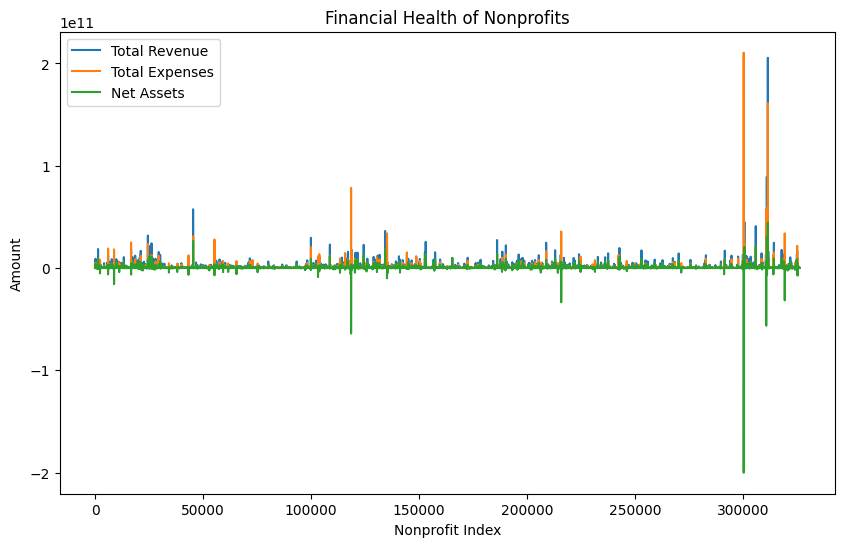

In [15]:
import numpy as np
import matplotlib.pyplot as plt

revenue_columns = ['totrev2bcola', 'totrev2acola', 'totrev2ccola', 'totrev2dcola', 'totrev2ecola', 'totrev2fcola', 'totprgmrevnue', 
                   'miscrevtota', 'miscrevtot11b', 'miscrevtot11c', 'miscrevtot11d', 'miscrevtot11e', 'totrevenue', 
                   'deferedrevnuend', 'txrevnuelevied170', 'txrevnuelevied509']
expense_columns = ['rntlexpnsreal', 'rntlexpnsprsnl', 'cstbasisecur', 'cstbasisothr', 'lessdirfndrsng', 'lessdirgaming', 
                   'officexpns', 'travelofpublicoffcl', 'interestamt', 'othrexpnsa', 'othrexpnsb', 'othrexpnsc', 
                   'othrexpnsd', 'othrexpnse', 'othrexpnsf', 'totfuncexpns', 'prepaidexpnsend', 'accntspayableend']

# Data Cleaning (Handle missing values, data types etc.)

# Calculating total revenue and expenses
df['Total_Revenue'] = df[revenue_columns].sum(axis=1)
df['Total_Expenses'] = df[expense_columns].sum(axis=1)

# Calculating net assets
df['Net_Assets'] = df['Total_Revenue'] - df['Total_Expenses']

# Analysis over time or by categories can be added here

# Visualization (Example)
plt.figure(figsize=(10, 6))
plt.plot(df['Total_Revenue'], label='Total Revenue')
plt.plot(df['Total_Expenses'], label='Total Expenses')
plt.plot(df['Net_Assets'], label='Net Assets')
plt.title('Financial Health of Nonprofits')
plt.xlabel('Nonprofit Index')
plt.ylabel('Amount')
plt.legend()
plt.show()


# Financial Health Analysis of Nonprofits

The graph above provides a visual representation of the financial health of various nonprofits, as indicated by their Total Revenue, Total Expenses, and Net Assets. Here are the key observations:

- **Consistent Financial Tracking**: For the majority of nonprofits, revenue and expenses are closely aligned, as seen by the blue and orange lines clustering near the baseline. This alignment suggests that, typically, expenses are proportional to revenue.

- **Net Assets Variance**: The green line representing net assets varies significantly for different nonprofits, with some showing high positive net assets and others with negative values, the latter indicating potential financial distress.

- **Outliers and Extreme Values**: There are noticeable spikes, especially towards the right end of the plot, where some nonprofits show exceptionally high revenue and expenses. These could be larger organizations or anomalies that may require verification.

- **Presence of Negative Net Assets**: Several nonprofits exhibit negative net assets, with green lines below the baseline, highlighting financial challenges such as liabilities exceeding assets.

- **Logarithmic Scale**: The amounts on the y-axis are presented on a logarithmic scale (noted as 1e11), signifying that the values range considerably, with some reaching into the billions.

- **Data Integrity Concerns**: The extreme variances observed for some entries could be indicative of data entry errors or unique financial events and warrant further investigation.

The analysis underscores the importance of scrutinizing the financial outliers and understanding the circumstances behind the negative net assets to fully grasp the financial stability of the nonprofits in question.


In [21]:
import pandas as pd

# Example: assuming df is your DataFrame
# df = pd.read_csv('your_file.csv') # Load your data

# Ensure 'tax_pd' is treated as a string and remove any trailing '.0'
df['tax_pd'] = df['tax_pd'].apply(lambda x: str(int(float(x))) if pd.notnull(x) else x)

# Pad 'tax_pd' with zeros to ensure a consistent format of six characters (YYYYMM)
df['tax_pd'] = df['tax_pd'].str.pad(width=6, side='left', fillchar='0')

# Convert 'tax_pd' to a datetime object with the format 'YYYY-MM'
df['TAX_PRD_DATE'] = pd.to_datetime(df['tax_pd'], format='%Y%m', errors='coerce')

# Display the first few rows to confirm the conversion
df[['tax_pd', 'TAX_PRD_DATE']].head()


,tax_pd,TAX_PRD_DATE
0,202004,2020-04-01
1,202104,2021-04-01
2,202204,2022-04-01
3,202105,2021-05-01
4,202205,2022-05-01


In [ ]:
df['Year'] = df['TAX_PRD_DATE'].dt.year

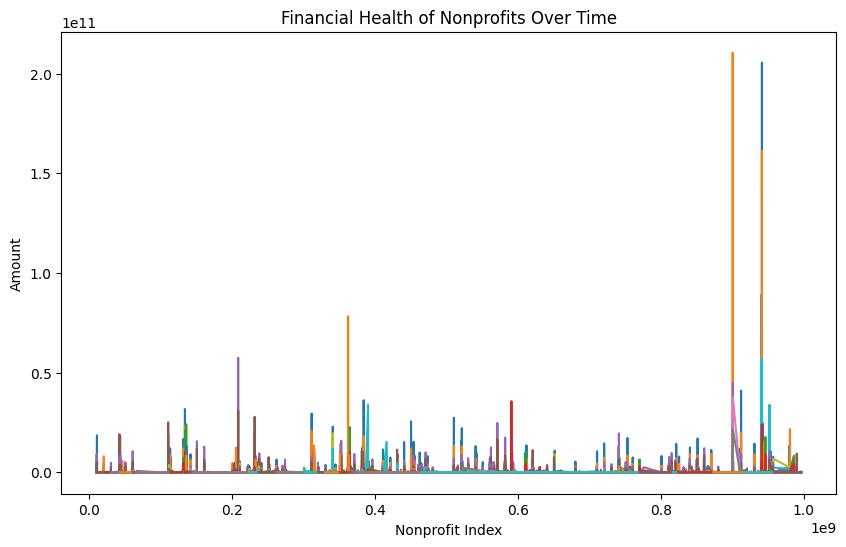

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Iterating over each unique tax period
for year in df['tax_pd'].unique():
    # Filtering data for the specific year
    yearly_data = df[df['tax_pd'] == year]

    # Ensure there's data for the year
    if not yearly_data.empty:
        plt.plot(yearly_data['EIN'], yearly_data['Total_Revenue'], label=f'Total Revenue {year}')
        plt.plot(yearly_data['EIN'], yearly_data['Total_Expenses'], label=f'Total Expenses {year}')

plt.title('Financial Health of Nonprofits Over Time')
plt.xlabel('Nonprofit Index')
plt.ylabel('Amount')
plt.show()


## Financial Health of Nonprofits Over Time Analysis

The chart presents a distribution of financial data across a spectrum of nonprofits, characterized by the following observations:

- The x-axis, labeled 'Nonprofit Index', seems to represent a large number of nonprofits, given the scale is up to \( 1 \times 10^9 \).
- The y-axis, labeled 'Amount', indicates the financial magnitude, scaled up to \( 1 \times 10^{11} \), suggesting that some nonprofits handle very large amounts of money.
- The data points, which are likely individual nonprofits, show a wide variance in financial metrics. 
- For most nonprofits, the financial figures (presumably including revenue, expenses) are relatively low, with many values clustering close to zero on the y-axis.
- There are a few nonprofits with exceptionally high values, indicated by spikes on the chart. These outliers suggest either substantially larger size and financial activity or potential anomalies in the data.
- The pattern of distribution is such that there are more nonprofits with smaller financial figures and progressively fewer as the financial figures increase.


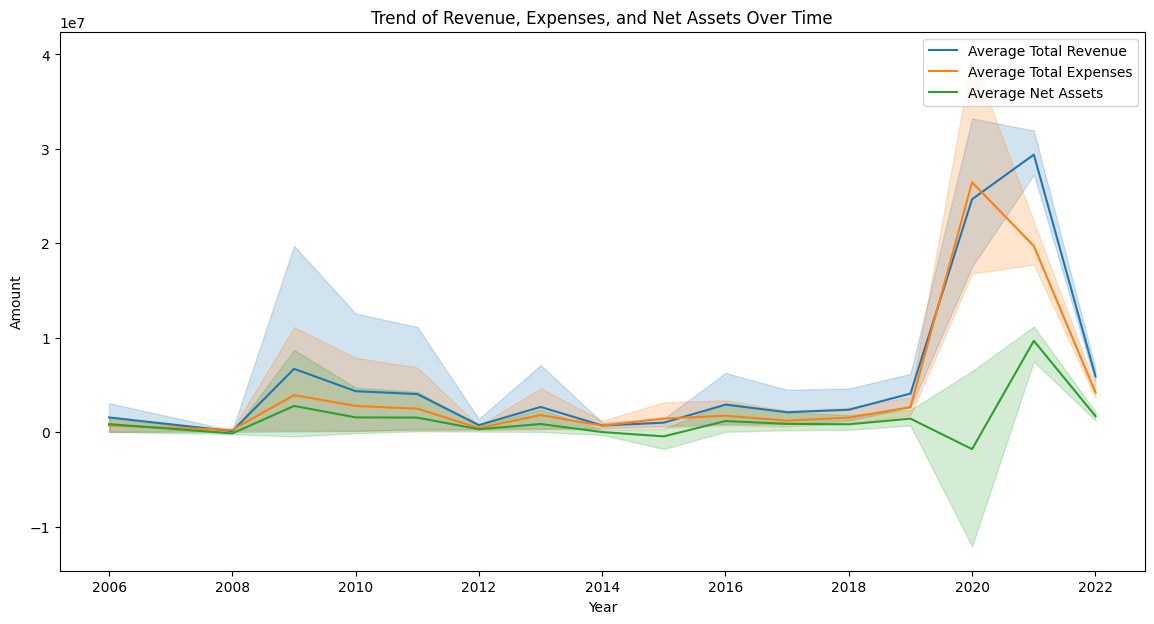

In [39]:
# Ensure the 'Year' column is a datetime type if not already
df['Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

# Now sort the DataFrame by the 'Year' column
df.sort_values('Year', inplace=True)

plt.figure(figsize=(14, 7))

# Trend analysis over years using lineplot for each category
# Seaborn will automatically handle the ordering of years on the x-axis
sns.lineplot(data=df, x='Year', y='Total_Revenue', estimator='mean', label='Average Total Revenue')
sns.lineplot(data=df, x='Year', y='Total_Expenses', estimator='mean', label='Average Total Expenses')
sns.lineplot(data=df, x='Year', y='Net_Assets', estimator='mean', label='Average Net Assets')

plt.title('Trend of Revenue, Expenses, and Net Assets Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()


# Trend of Revenue, Expenses, and Net Assets Over Time
- The trends for revenue, expenses, and net assets track closely together from 2006 to around 2018, indicating a proportionate growth between revenue and expenses, which in turn results in a relatively stable net assets figure.
- There's a sharp increase in revenue and net assets around 2020, followed by a significant decrease in 2022. Expenses also increase in 2020 but not as markedly as revenue, and they see a less pronounced decrease in 2022.
- The net assets line shows more volatility in recent years, particularly with a sharp peak in 2020 and then a significant drop in 2022, which could indicate a major event affecting assets but not equally impacting revenue or expenses (like a large one-time donation or asset revaluation).
- The notable dip in 2022 where net assets fall below zero suggests either large expenses, losses, or write-downs that have significantly impacted the financial position of the nonprofits.


# 2022 Ratios

# In this section I will examine the 2022 "990" Ratios and Efficiency

*The provided Python script processes a DataFrame of nonprofit financial data for the year 2022. It includes a function to calculate the year-over-year growth rate in contributions. After this, the DataFrame is grouped by nonprofit type and year to compute several financial health metrics: Operating Reserve Ratio, Fundraising Efficiency, Current Ratio, and Debt-to-Equity Ratio. These calculations are intended to assess the financial stability and efficiency of the nonprofits. The final results are stored in a DataFrame named grouped_metrics, which consolidates the calculated financial metrics along with the original data.*

In [52]:
df_nonprofits=df.copy()
df_nonprofits['Year']='2022'


# Define a function to calculate the Growth Rate in Contributions
def calculate_growth_rate(df):
    df_sorted = df.sort_values(by='Year')
    df_sorted['Previous Year Contributions'] = df_sorted['totcntrbgfts'].shift(1)
    df_sorted['Growth Rate in Contributions'] = (df_sorted['totcntrbgfts'] - df_sorted['Previous Year Contributions']) / df_sorted['Previous Year Contributions']
    return df_sorted

# Group by 'nonprofit_type' and 'Year', then apply the financial health metrics calculations
grouped_metrics = df_nonprofits.groupby(['subseccd', 'Year']).apply(calculate_growth_rate)

# Calculate the additional financial health metrics by group
grouped_metrics['Operating Reserve Ratio'] = grouped_metrics['totnetassetend'] / grouped_metrics['totfuncexpns']
grouped_metrics['Fundraising Efficiency'] = grouped_metrics['lessdirfndrsng'] / grouped_metrics['grsincfndrsng']
#grouped_metrics['Program Expense Ratio'] = grouped_metrics['prgmservexpns'] / grouped_metrics['totfuncexpns']
grouped_metrics['Current Ratio'] = grouped_metrics['totassetsend'] / grouped_metrics['totliabend']
grouped_metrics['Debt-to-Equity Ratio'] = grouped_metrics['totliabend'] / grouped_metrics['totnetassetend']

# Reset the index if you want to go back to a flat DataFrame
grouped_metrics = grouped_metrics.reset_index(drop=True)

# Now you can print or inspect your grouped_metrics DataFrame
print(grouped_metrics)




       efile          EIN  tax_pd  subseccd s501c3or4947a1cd schdbind  \
0          P  426057254.0  200906       2.0                N        N   
1          E  133732472.0  202111       2.0                N        N   
2          E  133732468.0  202111       2.0                N        N   
3          E  133997203.0  202112       2.0                N        N   
4          E  134043266.0  202106       2.0                N        N   
...      ...          ...     ...       ...              ...      ...   
326114     E  453261827.0  202112      29.0                N        N   
326115     E  453309488.0  202112      29.0                N        N   
326116     E  453321455.0  202112      29.0                N        N   
326117     E  451295465.0  202112      29.0                N        N   
326118     E  451294709.0  202112      29.0                N        Y   

       politicalactvtscd lbbyingactvtscd subjto6033cd dnradvisedfundscd  ...  \
0                      N             NaN   

In [41]:
# If you want to look at the averages of these metrics across the types and years:
average_metrics_by_type_and_year = grouped_metrics.groupby(['subseccd', 'Year']).mean().reset_index()

print(average_metrics_by_type_and_year)

    subseccd  Year           EIN  hospaudfinstmtcd      f1096cnt    fw2gcnt  \
0        2.0  2022  4.840005e+08          2.000000      6.525288   0.007511   
1        3.0  2022  4.888666e+08          1.286796    165.118019   3.041313   
2        4.0  2022  4.963434e+08          2.000000    200.394300  27.304197   
3        5.0  2022  4.936915e+08          2.000000    153.452119   0.088565   
4        6.0  2022  5.112994e+08          2.000000     95.038865   0.041851   
5        7.0  2022  4.464829e+08          2.000000     60.239953   2.740381   
6        8.0  2022  4.478353e+08          2.000000    466.041208   2.538511   
7        9.0  2022  4.390900e+08          2.000000    262.548701   0.011905   
8       10.0  2022  4.891762e+08          2.000000     15.100619   0.270124   
9       11.0  2022  3.949963e+08               NaN     46.400000   0.000000   
10      12.0  2022  6.563898e+08          2.000000    277.052756   0.011836   
11      13.0  2022  3.918707e+08          2.000000  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3732\2002500786.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_metrics_by_type_and_year = grouped_metrics.groupby(['subseccd', 'Year']).mean().reset_index()


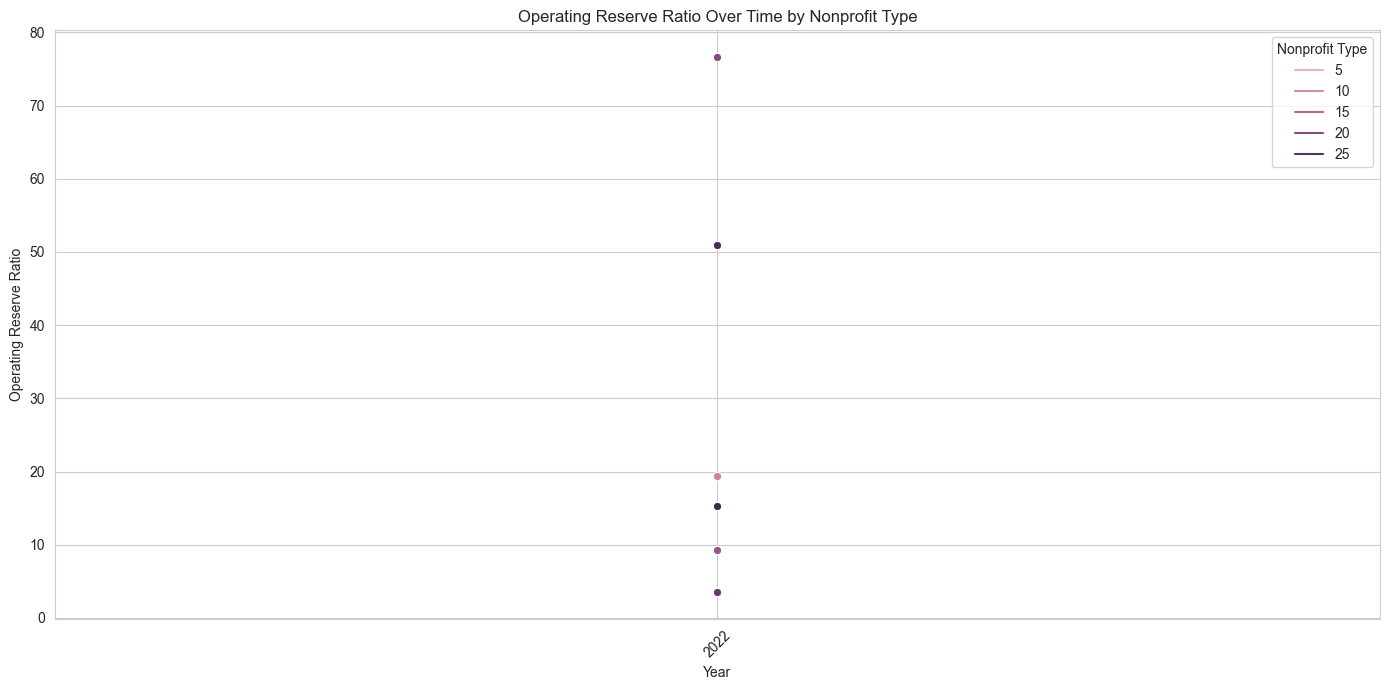

In [42]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Line chart for Operating Reserve Ratio Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_metrics_by_type_and_year, x='Year', y='Operating Reserve Ratio', hue='subseccd', marker='o')
plt.title('Operating Reserve Ratio Over Time by Nonprofit Type')
plt.xlabel('Year')
plt.ylabel('Operating Reserve Ratio')
plt.legend(title='Nonprofit Type')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


**The chart plots the Operating Reserve Ratio for five different nonprofit types in the year 2022. Nonprofit type 15 has the highest reserve ratio, potentially indicating a stronger financial safety net.** 

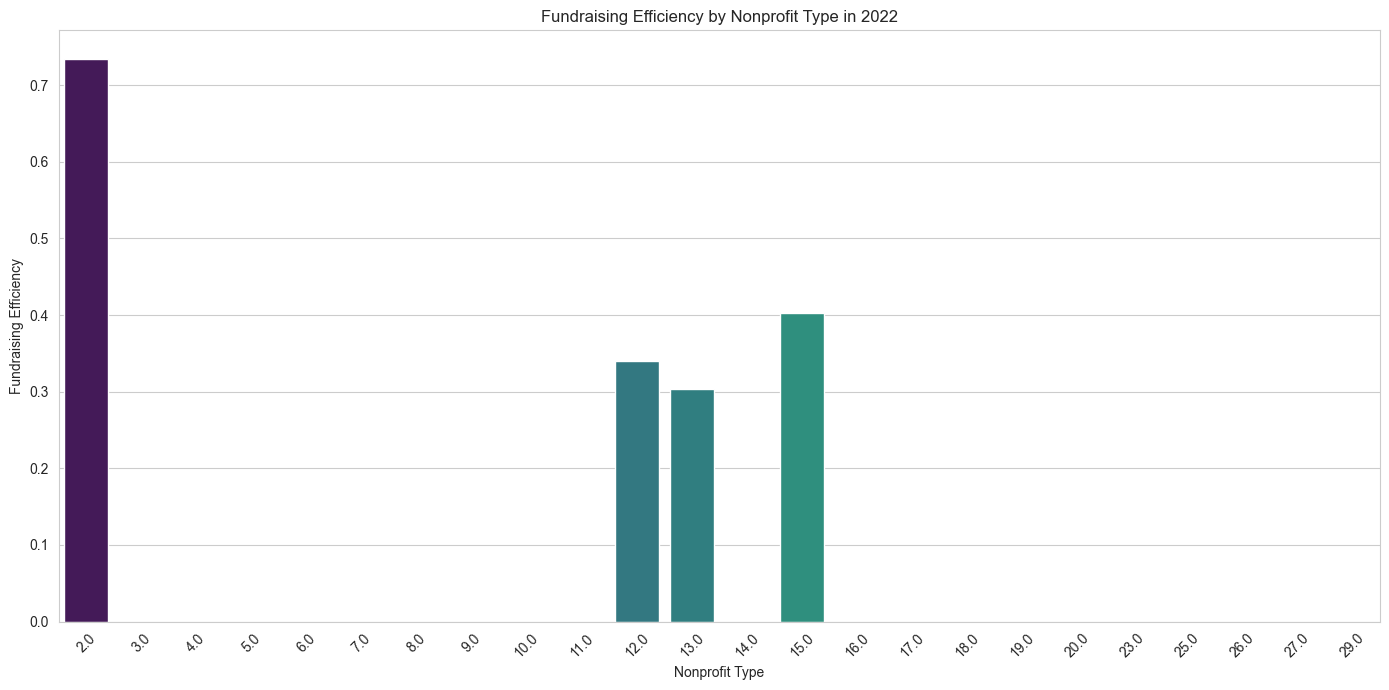

In [45]:
# Specific year to filter the DataFrame
specific_year = '2022'

# Filter the DataFrame for a specific year
df_specific_year = average_metrics_by_type_and_year[average_metrics_by_type_and_year['Year'] == specific_year]

# Bar chart for Fundraising Efficiency for a Specific Year
plt.figure(figsize=(14, 7))
sns.barplot(data=df_specific_year, x='subseccd', y='Fundraising Efficiency', palette='viridis')
plt.title(f'Fundraising Efficiency by Nonprofit Type in {specific_year}')
plt.xlabel('Nonprofit Type')
plt.ylabel('Fundraising Efficiency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


**The chart compares the fundraising efficiency of various nonprofit types labeled from 2 to 29. Nonprofit type 2 exhibits notably higher fundraising efficiency than all other types, with a value just under 0.8. Nonprofit types 11, 13, and 15 show moderate fundraising efficiency, with values around 0.4 to just over 0.3.There is a visible absence of data for nonprofit types 3-9 and 17-29, which could indicate either no data available or zero efficiency for those categories in 2022.**





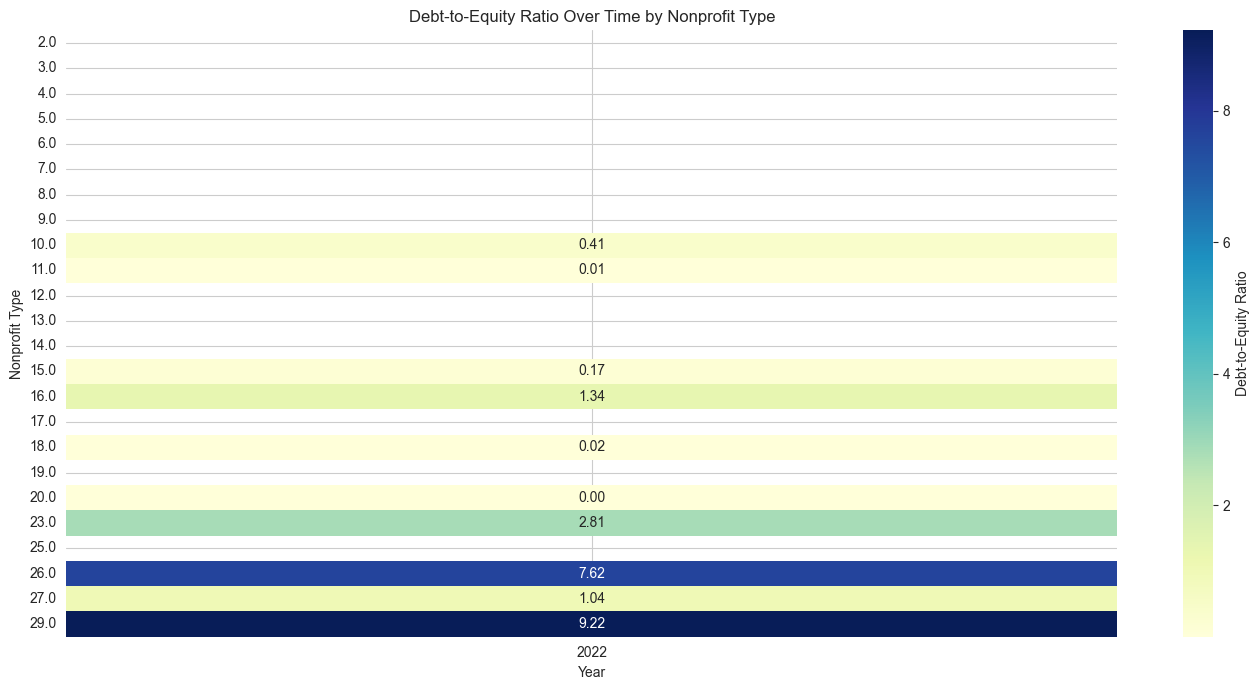

In [50]:
import warnings
warnings.filterwarnings('ignore')
heatmap_data = average_metrics_by_type_and_year.pivot("subseccd", "Year", "Debt-to-Equity Ratio")

# Heatmap for Debt-to-Equity Ratio
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Debt-to-Equity Ratio'})
plt.title('Debt-to-Equity Ratio Over Time by Nonprofit Type')
plt.xlabel('Year')
plt.ylabel('Nonprofit Type')
plt.tight_layout()
plt.show()


**Nonprofit types are indicated on the y-axis, ranging from 2 to 29. The Debt-to-Equity Ratio values are color-coded, with darker colors representing higher ratios. Nonprofit type 29 has an exceptionally high ratio of 9.22, which may indicate a heavily leveraged financial structure. Nonprofit types 16 and 23 also have higher ratios than the rest, at 1.34 and 2.81 respectively, but these are still lower than types 26 and 29. Several nonprofit types (10, 11, 15, 18, 21) have ratios very close to zero, suggesting minimal to no debt relative to equity. Nonprofit type 20 actually has a ratio of 0.00, indicating either no debt or it's not applicable for this type.**







# Data (990-PF)

In [55]:
df_990pf = pd.read_excel("22eoextract990pf.xlsx")

In [56]:
df_990pf.head()

,ELF,EIN,TAX_PRD,EOSTATUS,TAX_YR,OPERATINGCD,SUBCD,FAIRMRKTVALAMT,GRSCONTRGIFTS,SCHEDBIND,...,DVDNDSINTE,TRNSFRCASHCD,TRNSOTHASSTSCD,SALESASSTSCD,PRCHSASSTSCD,RENTLSFACLTSCD,REIMBRSMNTSCD,LOANSGUARCD,PERFSERVICESCD,SHARNGASSTSCD
0,E,10024907,202207,1,2021,Y,3,1485748,51100,Y,...,30419,N,N,N,N,N,N,N,N,N
1,E,10131950,202112,1,2021,Y,3,3482192,70541,Y,...,0,N,N,N,N,N,N,N,N,N
2,E,10211484,202206,1,2021,Y,3,18224730,10196,N,...,0,N,N,N,N,N,N,N,N,N
3,P,10211484,202006,1,2019,Y,3,17309645,30082,Y,...,0,N,N,N,N,N,N,N,N,N
4,E,10211504,202109,1,2020,N,3,3452167,0,N,...,0,N,N,N,N,N,N,N,N,N


In [57]:
rows , columns  = df_990pf.shape
print(f"Dataset has {rows} rows and {columns} columns ")

Dataset has 115024 rows and 180 columns 


In [58]:
df_990pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115024 entries, 0 to 115023
Columns: 180 entries, ELF to SHARNGASSTSCD
dtypes: float64(9), int64(123), object(48)
memory usage: 158.0+ MB


In [59]:
df_990pf.describe()

,EIN,TAX_PRD,EOSTATUS,TAX_YR,SUBCD,FAIRMRKTVALAMT,GRSCONTRGIFTS,INTRSTRVNUE,DIVIDNDSAMT,GRSRENTS,...,PROGSRVCFCOLD,PROGSRVCFCOLE,PROGSRVCGCOLD,PROGSRVCGCOLE,MEMBERSHPDUESD,MEMBERSHPDUESE,INTONSVNGSD,INTONSVNGSE,DVDNDSINTD,DVDNDSINTE
count,1.150240e+05,115024.000000,115024.000000,115024.000000,115024.000000,1.150240e+05,1.150240e+05,1.150240e+05,1.150240e+05,1.150240e+05,...,115024.000000,1.150240e+05,115024.000000,1.150240e+05,115024.000000,1.150240e+05,1.150240e+05,1.150240e+05,1.150240e+05,1.150240e+05
mean,4.849796e+08,202111.137658,1.541757,2020.802850,7.264919,1.381865e+07,1.071047e+06,7.695266e+03,1.482665e+05,1.222594e+04,...,8.687144,6.068556e+01,4.048729,2.572530e+02,23.420930,1.639125e+02,5.974701e+03,4.715696e+02,1.435675e+05,4.138843e+03
std,2.744610e+08,51.714738,2.380309,0.530953,19.010296,3.449515e+08,3.864290e+07,4.201170e+05,3.147767e+06,8.159157e+05,...,2572.750679,1.193303e+04,1325.951131,6.236062e+04,2227.943552,1.058781e+04,1.654002e+05,1.403725e+04,3.168596e+06,7.378696e+04
min,1.002491e+07,200712.000000,1.000000,2007.000000,3.000000,-1.678523e+06,-1.000000e+00,-3.837000e+03,0.000000e+00,-1.187250e+05,...,0.000000,-4.120000e+02,0.000000,0.000000e+00,0.000000,-1.290000e+03,-6.600000e+01,-9.000000e+00,-5.000000e+04,0.000000e+00
25%,2.560660e+08,202112.000000,1.000000,2021.000000,3.000000,6.904525e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.553740e+08,202112.000000,1.000000,2021.000000,3.000000,6.453715e+05,0.000000e+00,0.000000e+00,7.202000e+03,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.652000e+03,0.000000e+00
75%,8.109723e+08,202112.000000,1.000000,2021.000000,3.000000,2.966652e+06,2.500000e+04,1.100000e+01,4.185425e+04,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,3.000000e+00,0.000000e+00,3.491175e+04,0.000000e+00
max,9.980102e+08,202211.000000,12.000000,2021.000000,92.000000,5.732264e+10,6.239488e+09,1.308656e+08,6.580493e+08,2.373692e+08,...,863329.000000,3.597245e+06,449540.000000,2.076609e+07,411018.000000,2.384271e+06,3.361863e+07,2.056853e+06,6.580493e+08,1.734611e+07


In [60]:
df_990pf.columns

Index(['ELF', 'EIN', 'TAX_PRD', 'EOSTATUS', 'TAX_YR', 'OPERATINGCD', 'SUBCD',
       'FAIRMRKTVALAMT', 'GRSCONTRGIFTS', 'SCHEDBIND',
       ...
       'DVDNDSINTE', 'TRNSFRCASHCD', 'TRNSOTHASSTSCD', 'SALESASSTSCD',
       'PRCHSASSTSCD', 'RENTLSFACLTSCD', 'REIMBRSMNTSCD', 'LOANSGUARCD',
       'PERFSERVICESCD', 'SHARNGASSTSCD'],
      dtype='object', length=180)

There are so much information hidden in the excel file about the financial situation of organizations. Those columns represent the general informations about the company:
* 'ELF' :  E-file indicator
* 'EIN' : Employer Identification Number
* 'TAX_PRD' : Tax period (YYYYMM format)
* 'EOSTATUS' : EO Status Code
* 'TAX_YR' : SOI Year
* 'OPERATINGCD' : Operating foundation code
* 'SUBCD' : Subsection code
* 'FAIRMRKTVALAMT' : Total assets – e-o-y fair market value 
* 'GRSCONTRGIFTS' :  Contributions received
* 'SCHEDBIND' : Schedule B indicator

Between these two Columns are financial information columns i.e(Dividends, Cost of goods sold, Legal fees..)
* 'INTRSTRVNUE' : Interest Revenue
    .
    .
    .
    .
    .
    .
    .
'CRELAMT' : Credit elect amount

Between these two Columns are mixed information columns related with charity purposes i.e(Net value of noncharitable-use assets, Sale of assets to noncharitable exempt organization?...)
* 'TFAIRMRKTUNUSE' : Fair market value of assets not used for charitable purposes 
    .
    .
    .
    .
    .
    .
    .
'SHARNGASSTSCD' : Sharing of facilities, equipment, mailing lists, other assets, or paid employees?

In [63]:
# Converting TAX_PRD to date format (YYYYMM to YYYY-MM)
# Ensure TAX_PRD is a string for string manipulation
df_990pf['TAX_PRD'] = df_990pf['TAX_PRD'].astype(str)

# Pad TAX_PRD with zeros to ensure it has a consistent format of YYYYMM
df_990pf['TAX_PRD'] = df_990pf['TAX_PRD'].str.pad(width=6, side='left', fillchar='0')

# Convert TAX_PRD to 'YYYY-MM' date format
df_990pf['TAX_PRD_DATE'] = pd.to_datetime(df_990pf['TAX_PRD'], format='%Y%m')

# Display the first few rows to confirm the conversion
df_990pf[['TAX_PRD', 'TAX_PRD_DATE']].head()



,TAX_PRD,TAX_PRD_DATE
0,202207,2022-07-01
1,202112,2021-12-01
2,202206,2022-06-01
3,202006,2020-06-01
4,202109,2021-09-01


In [64]:
df_990pf.TAX_PRD_DATE.min() , df_990pf.TAX_PRD_DATE.max()

(Timestamp('2007-12-01 00:00:00'), Timestamp('2022-11-01 00:00:00'))

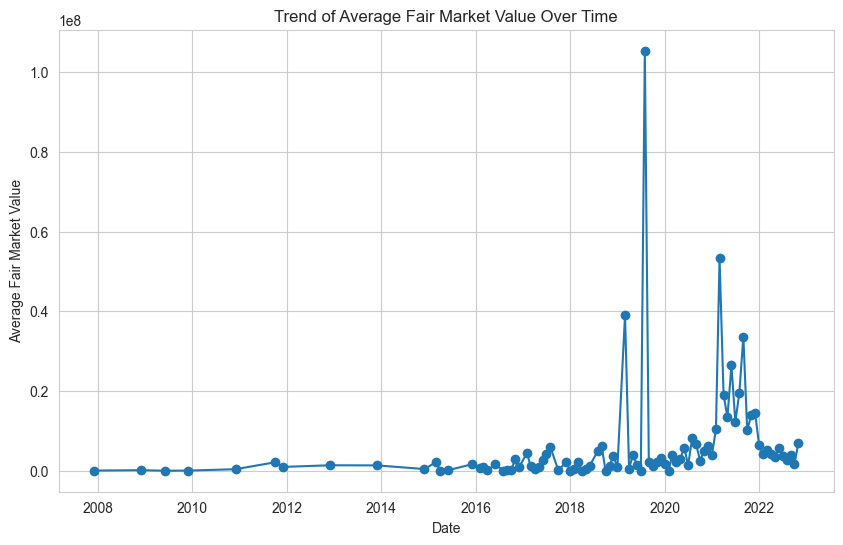

In [65]:
trend_data = df_990pf.groupby('TAX_PRD_DATE')['FAIRMRKTVALAMT'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trend_data['TAX_PRD_DATE'], trend_data['FAIRMRKTVALAMT'], marker='o')
plt.title('Trend of Average Fair Market Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Fair Market Value')
plt.grid(True)
plt.show()


## Trend of Average Fair Market Value Over Time

- The plot indicates a general trend of the Average Fair Market Value from 2008 to 2022.
- For most years, the Average Fair Market Value remains relatively low, with a baseline near zero.
- There are several significant spikes, particularly in the years approaching 2020 and another in 2022, where the value reaches well above the general trend line.
- The pattern of spikes may suggest occasional valuation peaks or periods of high asset valuation relative to the norm.
- These peaks could be due to specific economic events, reporting anomalies, or changes in asset valuations or donations.(COVID19 i.e)
- The y-axis is on a logarithmic scale, as indicated by the notation (1e8), allowing for the display of a wide range of values.
- Overall, the data points after 2018 are more volatile, with higher peaks and a general upward trend in valuation compared to the previous years.


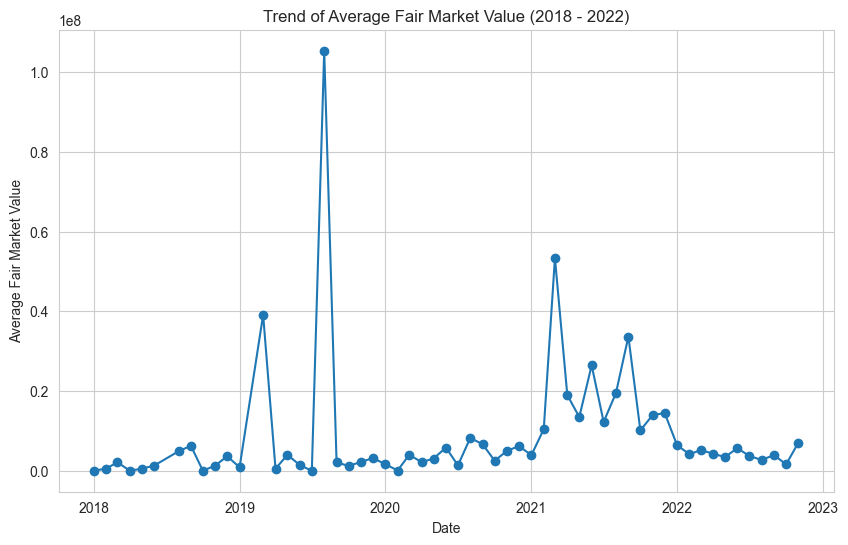

   TAX_PRD_DATE  FAIRMRKTVALAMT  FAIRMRKTVALAMT_Change
12   2019-03-01    3.909465e+07           3.824512e+07
13   2019-04-01    4.884285e+05          -3.860623e+07
17   2019-08-01    1.053492e+08           1.053492e+08
18   2019-09-01    2.066384e+06          -1.032828e+08
36   2021-03-01    5.333808e+07           4.293251e+07
37   2021-04-01    1.898432e+07          -3.435377e+07
43   2021-10-01    1.011929e+07          -2.354078e+07


In [66]:
filtered_data = df_990pf[(df_990pf['TAX_PRD_DATE'] >= '2018-01-01') & (df_990pf['TAX_PRD_DATE'] <= '2022-12-31')]

# Calculate mean fair market value
trend_data = filtered_data.groupby('TAX_PRD_DATE')['FAIRMRKTVALAMT'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(trend_data['TAX_PRD_DATE'], trend_data['FAIRMRKTVALAMT'], marker='o')
plt.title('Trend of Average Fair Market Value (2018 - 2022)')
plt.xlabel('Date')
plt.ylabel('Average Fair Market Value')
plt.grid(True)
plt.show()

# Identifying significant changes
trend_data['FAIRMRKTVALAMT_Change'] = trend_data['FAIRMRKTVALAMT'].diff()
significant_changes = trend_data[trend_data['FAIRMRKTVALAMT_Change'].abs() > trend_data['FAIRMRKTVALAMT_Change'].std()]
print(significant_changes)


## Analysis of Average Fair Market Value (2018 - 2022)

- The timeline from 2018 to 2022 is analyzed for the Average Fair Market Value.
- A baseline trend with relatively low values is observable throughout the period.
- There are distinct spikes in value, most notably in 2020, which could correlate with particular market events or significant changes in asset valuation.(Ask Field Expert)
- A few less pronounced peaks are also seen in 2019, 2021, and 2022, suggesting periodic increases in fair market valuations.
- The y-axis is logarithmic, with a scale up to \( 1 \times 10^8 \), indicating that the peaks represent substantial increases in value from the baseline.
- The data shows volatility, with values quickly rising and falling, which might indicate transient factors affecting market valuations.
- The reason behind these spikes and their implications on the involved entities or assets would require further investigation, possibly considering external economic factors or internal organizational changes.


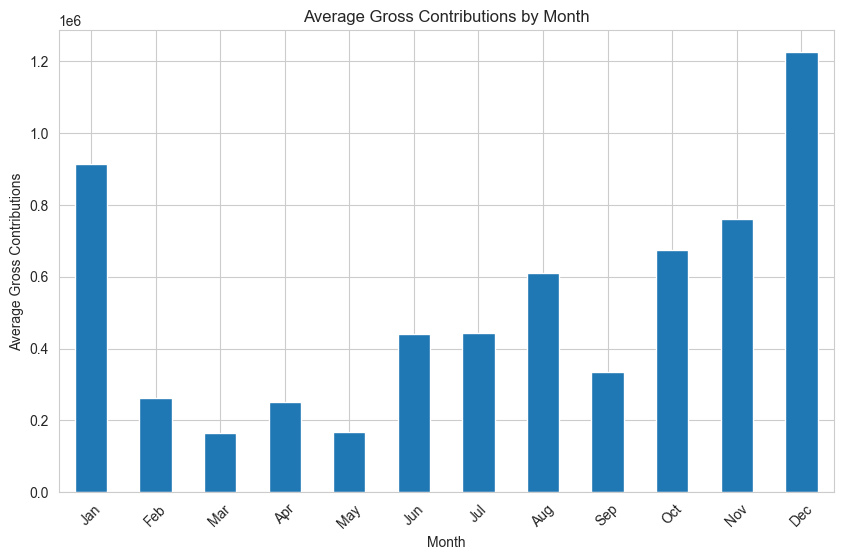

In [67]:
# Extracting month from TAX_PRD_DATE
df_990pf['Month'] = df_990pf['TAX_PRD_DATE'].dt.month

# Aggregating GRSCONTRGIFTS by month
seasonal_data = df_990pf.groupby('Month')['GRSCONTRGIFTS'].mean()

# Plotting
plt.figure(figsize=(10, 6))
seasonal_data.plot(kind='bar')
plt.title('Average Gross Contributions by Month')
plt.xlabel('Month')
plt.ylabel('Average Gross Contributions')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


## Monthly Trends in Average Gross Contributions

- The chart showcases a clear seasonal trend in contributions to nonprofits, broken down by month.
- Contributions peak in January and December, indicating a significant increase in donations during these months.
- The lowest contributions are observed in April, July, and September, suggesting potential seasonal lows in donation activity.
- A steady increase in contributions is visible from September, culminating in the highest contributions in December, which could be attributed to end-of-year giving and holiday season donations.
- The y-axis scale, noted as \( 1 \times 10^6 \), points to the contribution amounts being in the millions.
- This seasonality could be critical for nonprofit financial planning and resource allocation throughout the year.


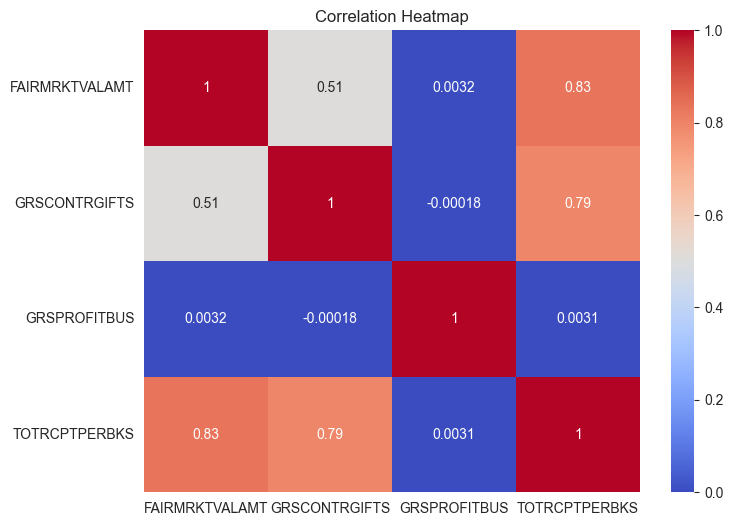

In [68]:
import seaborn as sns

##'TOTRCPTPERBKS' = Total Revenue
##'GRSPROFITBUS' = Gross Profit
## 'GRSCONTRGIFTS' = Contributions Received
## 'FAIRMRKTVALAMT' = Total assets – e-o-y fair market value 

correlation_data = df_990pf[['FAIRMRKTVALAMT', 'GRSCONTRGIFTS',"GRSPROFITBUS", 'TOTRCPTPERBKS']]

# Calculating correlation matrix
corr_matrix = correlation_data.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Correlation Heatmap Analysis

- **FAIRMRKTVALAMT**: Appears to be strongly correlated with TOTRCPTPERBKS, with a correlation coefficient of 0.83, indicating that as the fair market value amount increases, the total reported per books tends to increase as well.

- **GRSCONTRGIFTS**: Shows a moderate positive correlation of 0.51 with FAIRMRKTVALAMT, suggesting that higher gross contributions might be associated with higher fair market value amounts.

- **GRSPROFITBUS**: Has very low and insignificant correlations with all other variables, closest to zero, which implies no linear relationship.

- **TOTRCPTPERBKS**: Not only does it correlate with FAIRMRKTVALAMT, but it also shows a strong correlation of 0.79 with GRSCONTRGIFTS, suggesting that higher total receipts reported are associated with higher gross contributions.

- The color scheme reflects the strength of the correlation, with red indicating a positive correlation, blue a negative correlation, and the intensity of the color indicating the strength of the correlation.
  
- The correlations near zero (colored in light blue and light red) suggest no meaningful relationship between those particular pairs of variables.


# Regional Data 

In [69]:
df_eo1 = pd.read_csv('eo1.csv')
df_eo2 = pd.read_csv('eo2.csv')
df_eo3 = pd.read_csv('eo3.csv')
df_eo4 = pd.read_csv('eo4.csv')
df_eo_xx = pd.read_csv('eo_xx.csv')
df_eo_pr = pd.read_csv('eo_pr.csv')

In [70]:
df_regional = pd.concat([df_eo1, df_eo2, df_eo3, df_eo4,df_eo_pr,df_eo_xx])

In [71]:
df_regional.shape

(1862653, 28)

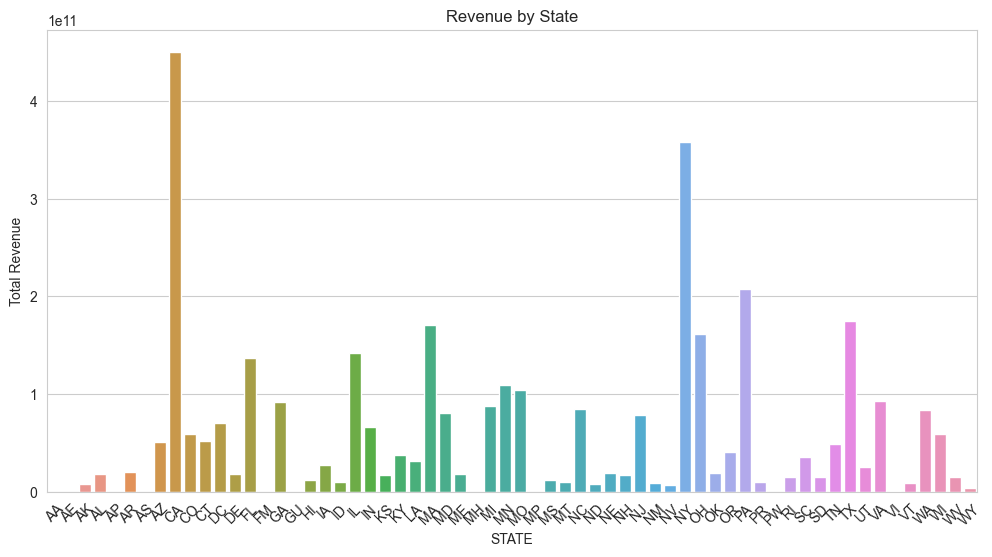

In [72]:
state_wise_revenue = df_regional.groupby('STATE')['REVENUE_AMT'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_wise_revenue.index, y=state_wise_revenue.values)
plt.title('Revenue by State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


## Revenue by State

- The chart displays the total revenue for nonprofit organizations across different states.
- There is a significant variation in revenue between states, with certain states exhibiting substantially higher revenues.
- The state with the highest revenue stands out distinctly, with a total revenue reaching just over \( 4 \times 10^{10} \), as indicated on the y-axis.
- A few other states show notably high revenue figures, although none as high as the leading state.
- The majority of states have much lower total revenue figures, with several states clustered toward the lower end of the revenue scale.
- The y-axis uses a logarithmic scale, noted as \( 1e11 \), to accommodate the wide range of revenue figures.
- The distribution of revenue suggests that a small number of states may host larger or more numerous nonprofits, resulting in higher total revenue figures.(CA, NY, TX, PA)


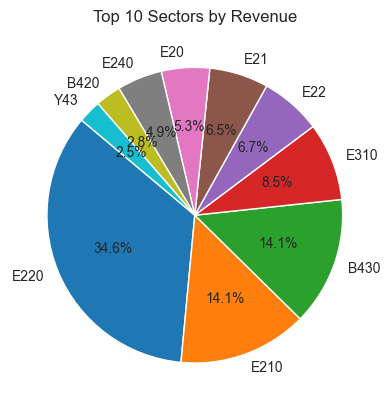

In [73]:
df_regional['REVENUE_AMT'] = df_regional['REVENUE_AMT'].abs()

# Grouping by NTEE_CD (sector) and summing the REVENUE_AMT, then getting the top 10 sectors
top_10_sectors = df_regional.groupby('NTEE_CD')['REVENUE_AMT'].sum().nlargest(10)

# Plotting a pie chart for the top 10 sectors
top_10_sectors.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Top 10 Sectors by Revenue')
plt.ylabel('')  # Hides the y-label for clarity
plt.show()


## Top 10 Sectors by Revenue

- The largest sector, E220(Health,Hospital), dominates the chart with 34.6% of the total revenue.
- E22|	General Hospitals	|Health care facilities that are licensed to operate twenty-four hours per day and offer diagnostic and treatment services as well as emergency and critical care services for people who have illnesses or injuries which require immediate, short-term intervention.
- Sectors E210 and B430 are the next largest, each comprising 14.1% of the total.
- B43	Universities	Postsecondary educational institutions that offer postgraduate study at masters or doctorate levels in addition to an undergraduate program for people who meet entry level requirements and are interested in an advanced education. Some institutions of university status are known as colleges or institutes.
- E31	Group Health Practices	Organizations that provide both health care services and underwrite health and medical insurance. Also included are medical groups which provide health care for HMO members on a contract with the HMO and physician practice groups generally associated with teaching, research, and public hospitals.
- E310 contributes 8.5%, while the remaining sectors (E20, E21, E22, E240, B420, Y43) each account for less than 7% of the total, with the smallest at 2.5%.
- The visual suggests a significant concentration of revenue in a few top sectors, with E220 being the most prominent.
- The chart highlights the diversity in sector revenue distribution, with a steep drop-off from the largest sector to smaller ones.


# Final Report: Nonprofit Financial Health and Trends Analysis

## Dataset Overview
- The dataset originates from an Excel spreadsheet with data dictionaries across different sheets ('990', '990-PF', 'Regional Data').
- The '990' series forms contain comprehensive tax data from various nonprofits, spanning from 2012 to 2022.
- A total of 326,123 records with 246 features were examined, providing a granular view of financial activities over a decade.

## Problem Statement and Importance
- The primary objective is to analyze the financial health and operational trends of nonprofit organizations.
- Understanding these trends is vital for stakeholders, such as investors, regulatory bodies, and the nonprofits themselves, to make informed decisions regarding funding, governance, and strategic planning.

## Analyses and Findings

### Financial Health Over Time
- **Revenue and Expense Trends**: A proportional increase between revenue and expenses was noted until 2018, with net assets remaining relatively stable, suggesting a healthy financial status for most nonprofits during this period.
- **Volatility and Events**: The year 2020 marked significant volatility, with a notable peak in both revenue and net assets, followed by a drastic decline in 2022. This fluctuation could reflect external events affecting financial stability, such as the COVID-19 pandemic.

### Growth Rate in Contributions
- A function to calculate year-over-year growth in contributions highlighted variability in donor behavior, which is crucial for predicting future funding levels.

### Financial Ratios and Efficiency
- Ratios like the Operating Reserve Ratio, Fundraising Efficiency, Current Ratio, and Debt-to-Equity Ratio were calculated for 2022, revealing a mixture of robust and weak financial underpinnings across different nonprofit types.

### Seasonal Donation Trends
- A marked seasonality in donations was observed, with peaks in January and December, aligning with the end-of-year giving traditions and possibly tax planning strategies of donors.

### Revenue by State
- A state-wise analysis revealed disparities in revenue collection, with certain states like California, New York, Texas, and Pennsylvania showing significantly higher revenues, which may correlate with the presence of larger or more nonprofits in these regions.

### Sector-Wise Revenue Distribution
- A pie chart analysis for the top 10 sectors by revenue underscored a substantial concentration in sectors like Health and Education, with the Health sector (E220) alone accounting for 34.6% of total revenue.

### Correlation Analysis
- The heatmap showed a strong positive correlation between fair market value and total reported per books, suggesting that asset valuation may significantly influence reported revenue.

## Conclusion
The comprehensive analysis of the nonprofit sector's financial data from 2012 to 2022 has highlighted crucial trends and health indicators. While there is evidence of stability in earlier years, recent events have introduced volatility, emphasizing the need for adaptive strategies and robust financial planning to navigate future uncertainties in the nonprofit sector.
